# AI developers coding general stats

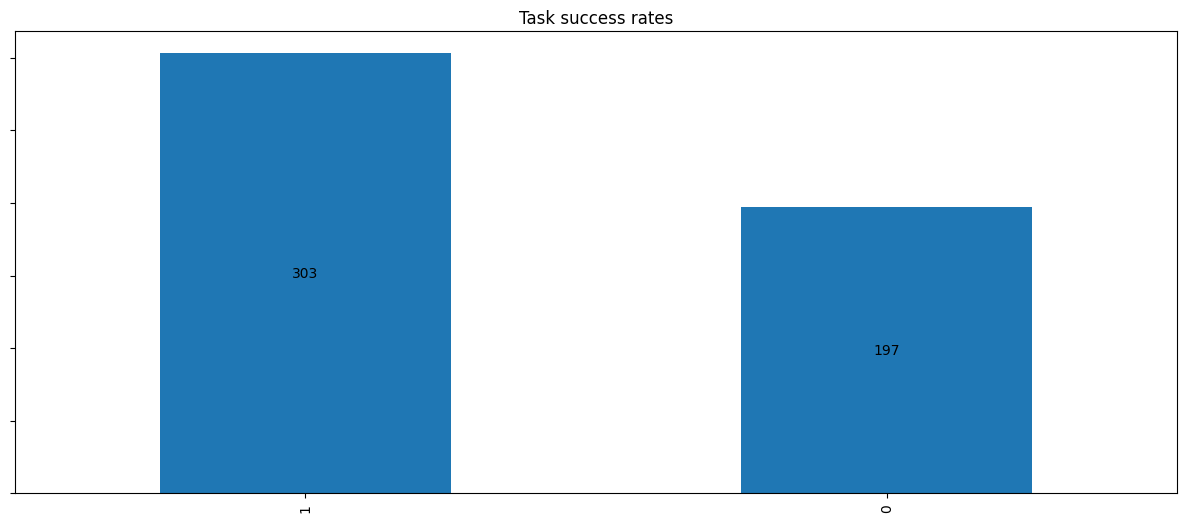

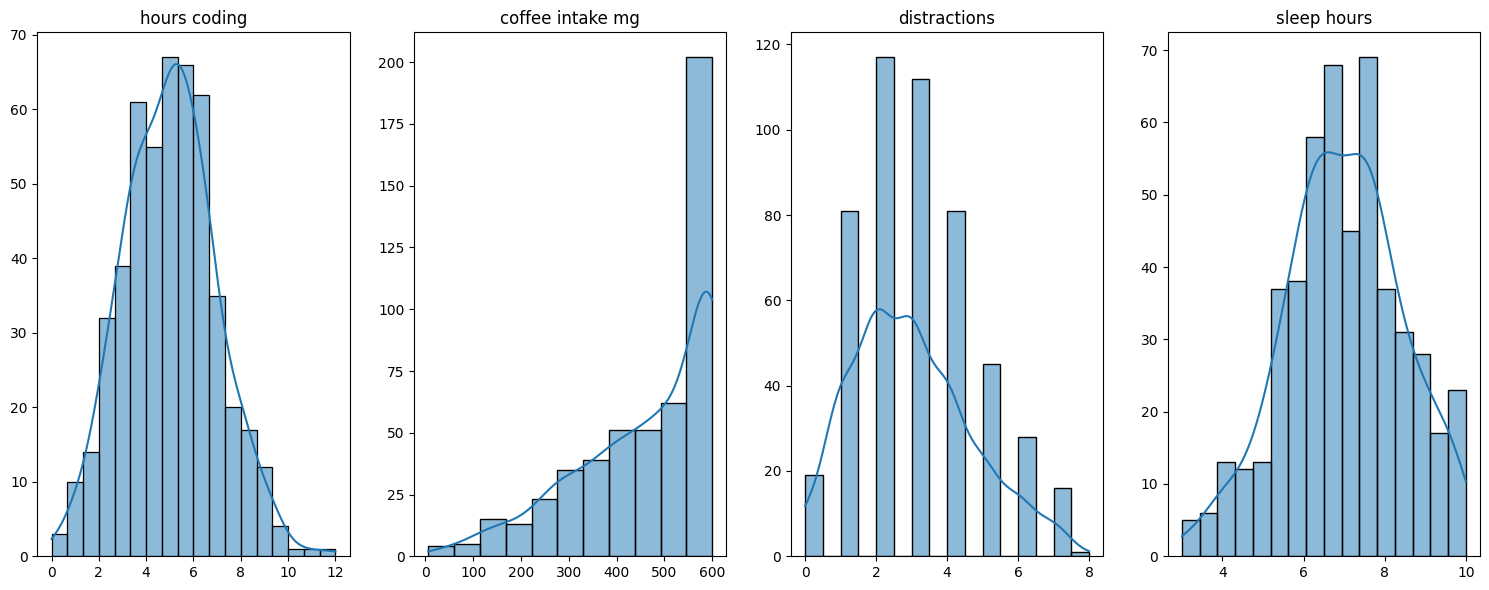

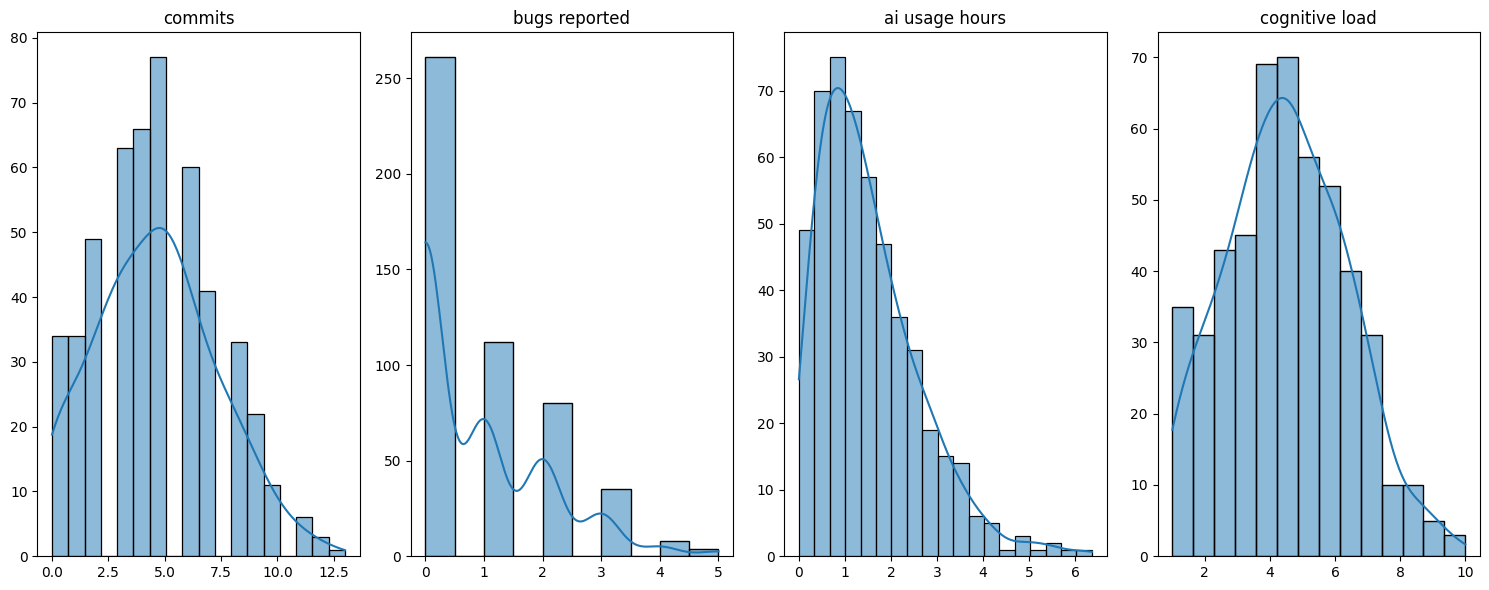

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, label_type=location, rotation=rotation)
    axes.set_xlabel("")
    axes.set_ylabel("")
    axes.set_yticklabels(())

def training_classification():
    rfc = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    etc = ExtraTreesClassifier()
    lgr = LogisticRegression()
    svc = SVC()
    mnb = MultinomialNB()
    xgb = XGBClassifier()
    lgb = LGBMClassifier(verbose=-100)
    cat = CatBoostClassifier(verbose=False)

    models = [rfc, abc, gbc, etc, lgr,
             svc, mnb, xgb, lgb, cat]

    names = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees", "Logistic Regression",
            "SVC", "Naive Bayes", "XGBoost", "LightGBM", "Cat Boost"]

    scores = []
    cms = dict()
    reports = dict()

    for i, j in enumerate(names):
        models[i].fit(x_train, y_train)
        pred = models[i].predict(x_test)
        scores += [accuracy_score(pred, y_test)]
        cms[j] = confusion_matrix(pred, y_test)
        reports[j] = classification_report(pred, y_test)

    dt = pd.DataFrame({"scores": scores}, index=names)
    dt = dt.sort_values("scores", ascending=False)

    dt["scores"] = dt["scores"]*100
    dt["scores"] = round(dt["scores"], 2)

    fig, axes = plt.subplots(figsize=(15, 6))

    dt["scores"].plot(kind="bar", ax=axes)
    bar_labels(axes)

    index = 0

    for _ in range(2):
        fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
        for i in range(5):
            sns.heatmap(cms[dt.index[index]], annot=True, ax=axes[i])
            axes[i].set_title("{}: {}%".format(dt.index[index], dt.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()

    for i in dt.index:
        print("*"*30)
        print("\n")
        print(i)
        print("\n")
        print(reports[i])

df = pd.read_csv("/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv")

fig, axes = plt.subplots(figsize=(15, 6))

df["task_success"].value_counts().plot(kind="bar", ax=axes)
bar_labels(axes, 0, "center")
axes.set_title("Task success rates")
plt.show()

index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for i in range(4):
        sns.histplot(df, x=df.columns[index], kde=True, ax=axes[i])
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_title(df.columns[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Sucessfully completed tasks stats

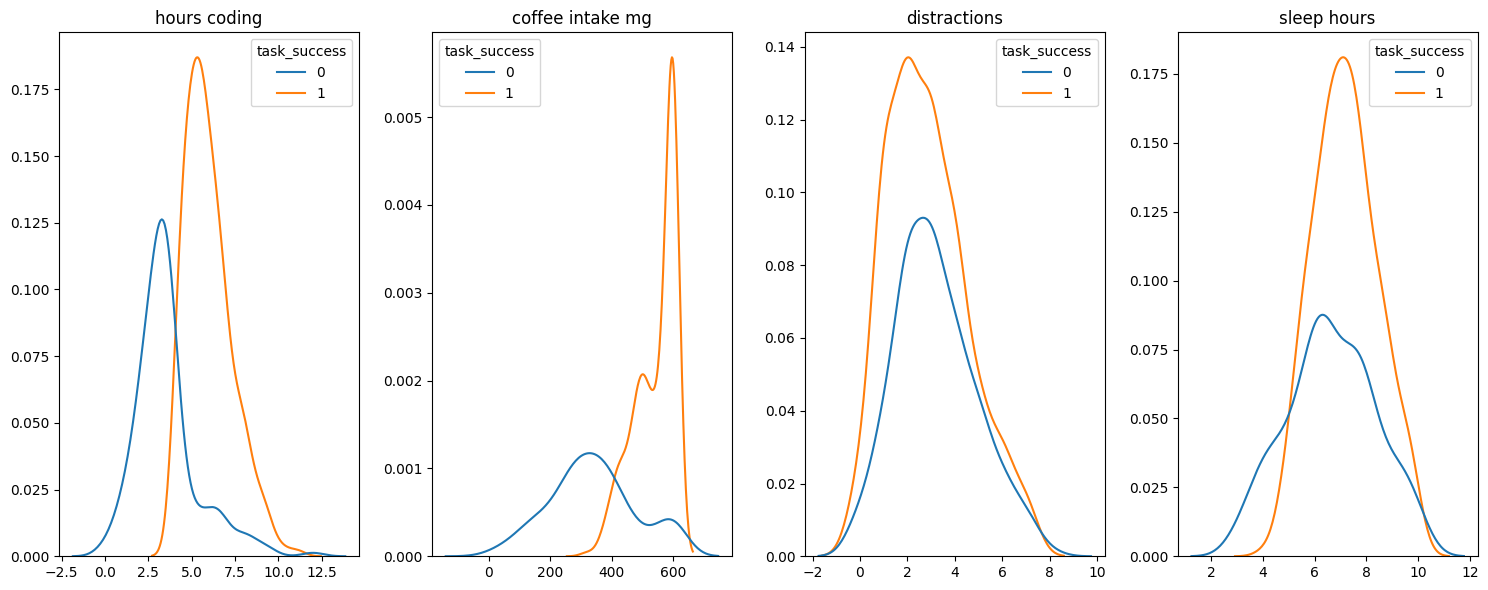

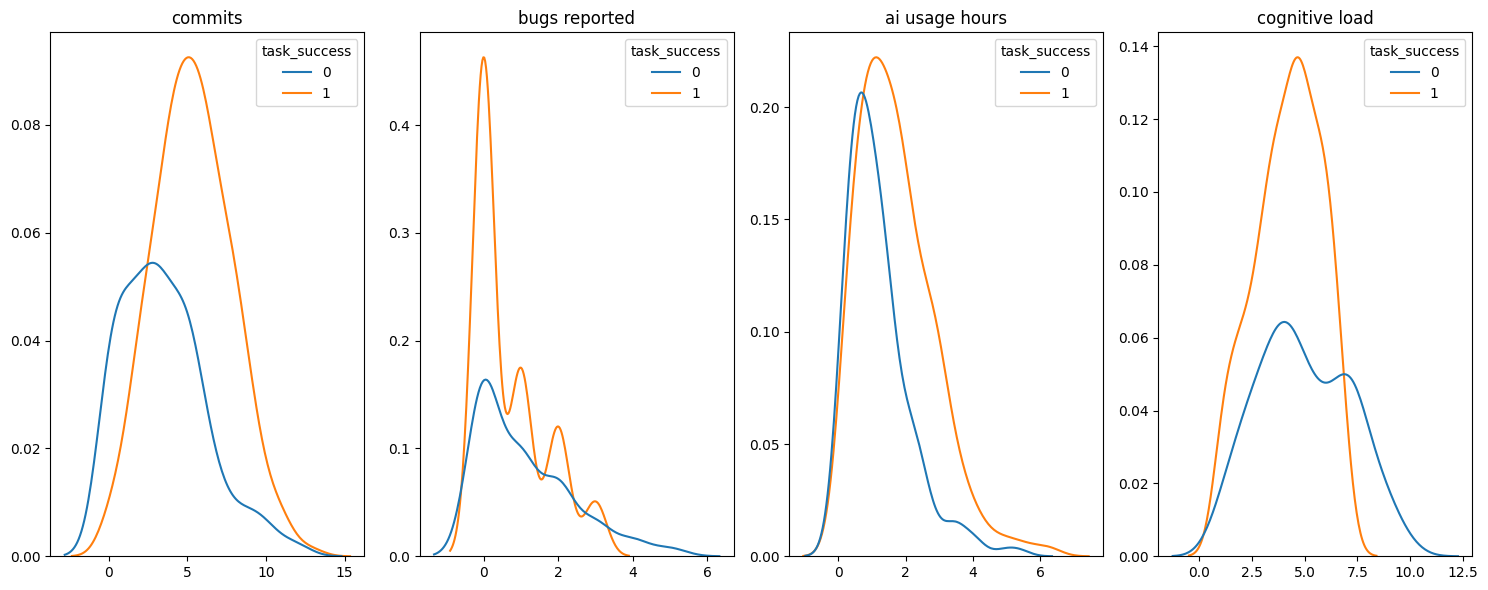

In [2]:
index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for i in range(4):
        sns.kdeplot(df, x=df.columns[index], hue=df.columns[-1], ax=axes[i])
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_title(df.columns[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Features engineering

In [3]:
df["coding out of 24 hours, ratio"] = df["hours_coding"]/24.0
df["sleeping out of 24 hours, ratio"] = df["sleep_hours"]/24.0
df["free time"] = abs(24.0 - (df["hours_coding"] + df["sleep_hours"]))
df["ai usage time, ratio"] = df["ai_usage_hours"]/(df["hours_coding"])

df["ai usage time, ratio"].fillna(0, inplace=True)

df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success,"coding out of 24 hours, ratio","sleeping out of 24 hours, ratio",free time,"ai usage time, ratio"
0,5.99,600,1,5.8,2,1,0.71,5.4,1,0.249583,0.241667,12.21,0.118531
1,4.72,568,2,6.9,5,3,1.75,4.7,1,0.196667,0.287500,12.38,0.370763
2,6.30,560,1,8.9,2,0,2.27,2.2,1,0.262500,0.370833,8.80,0.360317
3,8.05,600,7,6.3,9,5,1.40,5.9,0,0.335417,0.262500,9.65,0.173913
4,4.53,421,6,6.9,4,0,1.26,6.3,1,0.188750,0.287500,12.57,0.278146


# Detecting task success status using trained ML models

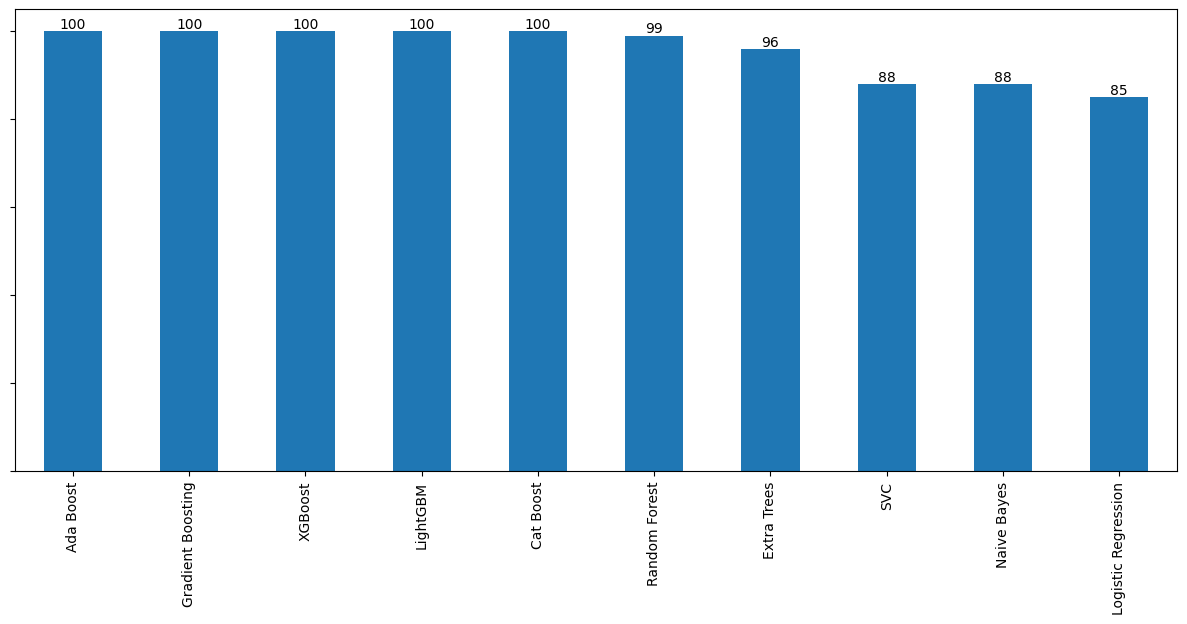

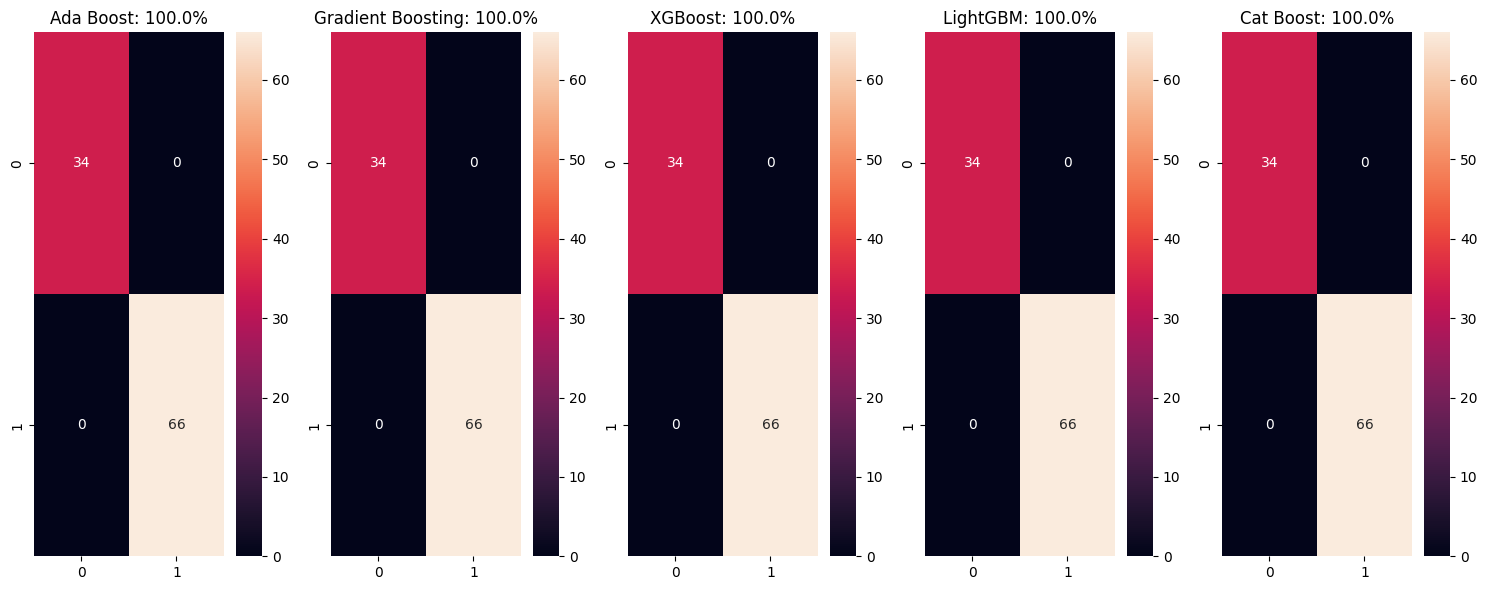

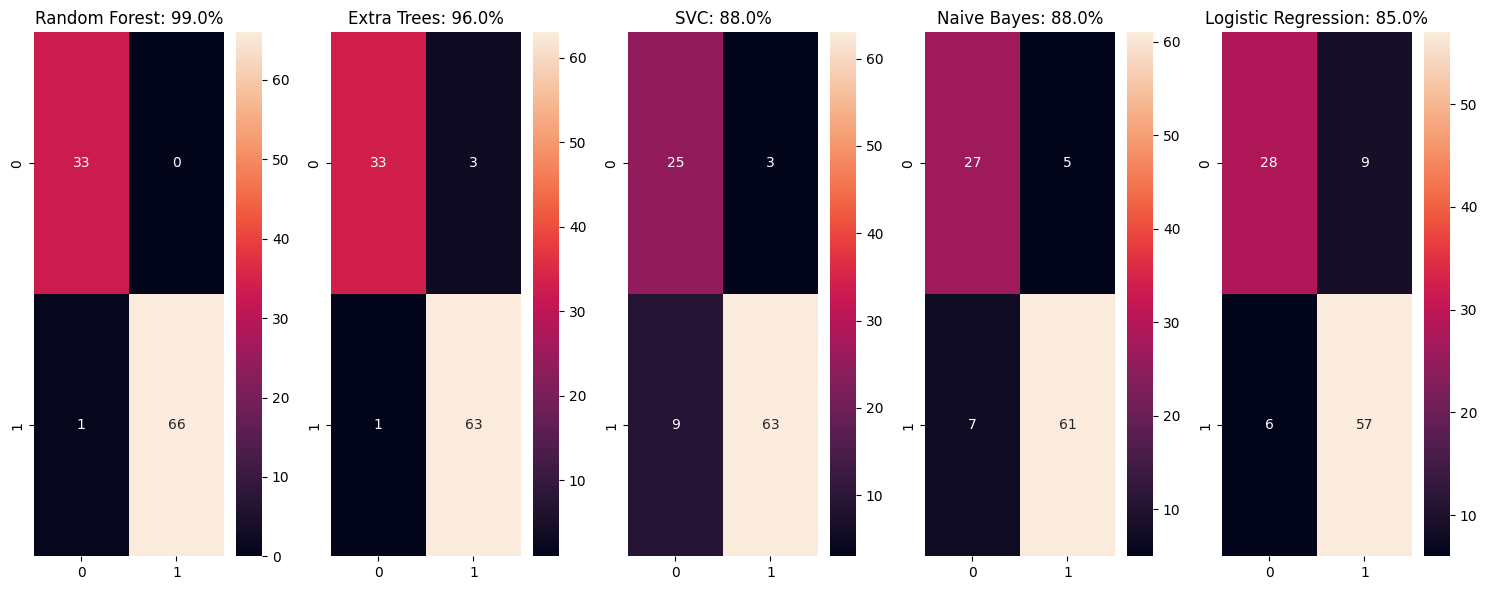

******************************


Ada Boost


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        66

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

******************************


Gradient Boosting


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        66

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

******************************


XGBoost


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        66

    accuracy                           1.

In [4]:
x = df.drop("task_success", axis=1).values
y = df["task_success"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

training_classification()